In [ ]:
# Task 1

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [ ]:
import pandas as pd

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=column_names, na_values='?')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [ ]:
X=heart_data.drop('target', axis=1)
y=heart_data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
# Task 2

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [ ]:
numerical_features = heart_data.select_dtypes(include=['float64']).columns

In [ ]:
numerical_features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])

In [ ]:
X_test[numerical_features] = imputer.transform(X_test[numerical_features])

In [ ]:
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_train_preprocessed.shape

(242, 38)

In [ ]:
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
X_train_preprocessed.shape

(242, 38)

In [ ]:
# Task 3 - XG Boost

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_blobs(n_samples=50, centers=2, )

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
xgb_model = XGBClassifier(random_state=42)
label_encoder_xgb = LabelEncoder()
y_train_encoded = label_encoder_xgb.fit_transform(y_train)
y_test_encoded = label_encoder_xgb.transform(y_test)

In [ ]:
xgb_model.fit(X_train, y_train_encoded.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_predictions = xgb_model.predict(X_test)

In [ ]:
xgb_prediction = xgb_model.predict(X_test)

In [ ]:
xgb_predictions_original_labels = label_encoder_xgb.inverse_transform(xgb_predictions)

In [ ]:
xgb_accuracy = accuracy_score(y_test, xgb_predictions_original_labels)

In [ ]:
print(f'XGB accuracy {xgb_accuracy}')

XGB accuracy 0.47540983606557374


In [ ]:
# Task 4 - Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# ROUND 1

In [ ]:
param_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
}

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 5}


In [ ]:
print(grid_search.best_score_)

0.6034863945578232


In [ ]:
# ROUND 2

In [ ]:
param_grid = {
    'n_estimators': [1,2,5],
    'max_depth': [2,5,10],
    'min_samples_split': [10, 12, 15],
}

In [ ]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_split': [10, 12, 15],
                         'n_estimators': [1, 2, 5]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 5}


In [ ]:
print(grid_search.best_score_)

0.6034863945578232


In [ ]:
best_rf_model = grid_search.best_estimator_

In [ ]:
best_rf_model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=5,
                       random_state=42)>

In [ ]:
y_pred_best = best_rf_model.predict(X_test)

In [ ]:
accuracy_best = accuracy_score(y_test, y_pred_best)

In [ ]:
print("Best Model Accuracy:", accuracy_best)

Best Model Accuracy: 0.4918032786885246


In [ ]:
# Task 5

In [ ]:
import xgboost as xgb

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

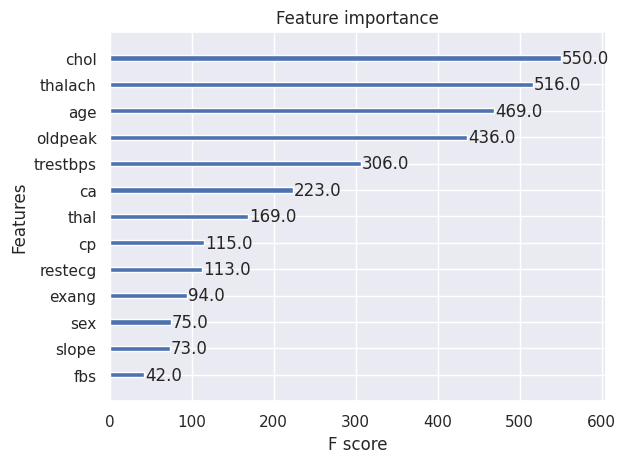

In [ ]:
xgb.plot_importance(xgb_model)

In [ ]:
feature_importance = best_rf_model.feature_importances_

In [ ]:
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

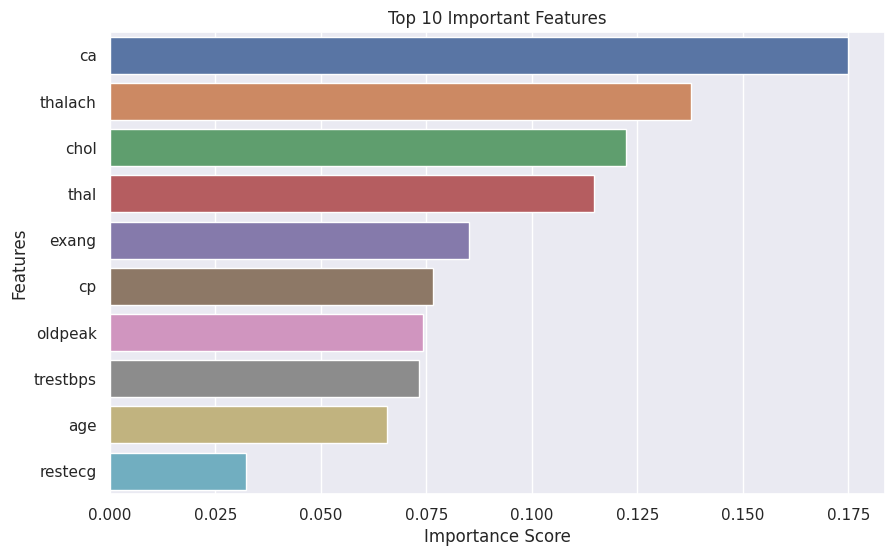

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df[:10])
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
# Task 6

In [ ]:
# inital_model = xgb_model
tuned_model = xgb.XGBClassifier(**best_params, objective='binary:logistic', seed=42)
tuned_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:32:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_samples_split=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import classification_report

# Evaluate initial model
y_pred_initial = xgb_model.predict(X_test)
print("Initial Model Performance:")
print(classification_report(y_test, y_pred_initial))

# Evaluate tuned model
y_pred_tuned = best_rf_model.predict(X_test)
print("Tuned Model Performance:")
print(classification_report(y_test, y_pred_tuned))



Initial Model Performance:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.00      0.00      0.00        12
           2       0.20      0.22      0.21         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.22      0.25      0.23        61
weighted avg       0.41      0.48      0.44        61

Tuned Model Performance:
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        29
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.30      0.43      0.35         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.27      0.22        61
weighted avg       0.34  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
